# LAB 04

## California House Price Prediction
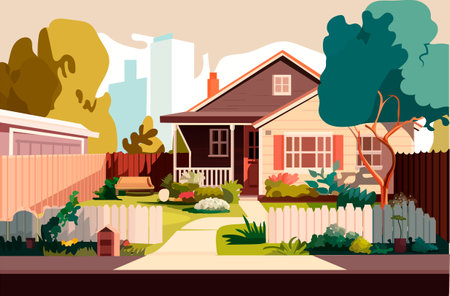

### Bài tập 1

In [1]:
#import thư viện cần thiết
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
df = pd.read_csv('.\housing.csv')

In [2]:
#10 du lieu dau tien cua bo data
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


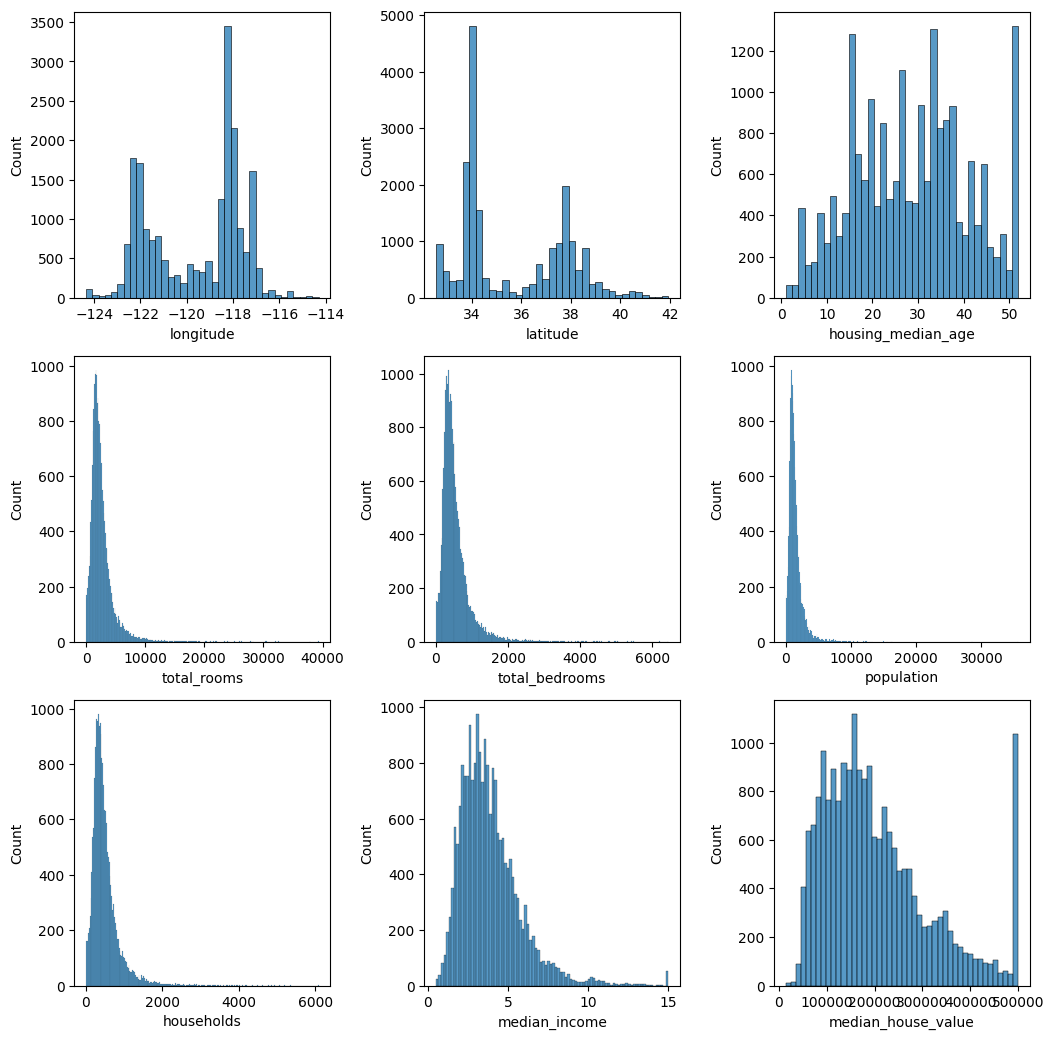

In [3]:
columns = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity']
# Vẽ histplot cho các thuộc tính numerical
n_rows=3
n_cols=3

fig,ax=plt.subplots(n_rows,n_cols,figsize=(n_cols*3.5,n_rows*3.5))#tạo subplot cho các cột
 #vong for ve cho 9 box
for r in range (0,n_rows):
    for c in range (0,n_cols):
        i=(r*n_cols)+c;
        if i < len(columns):
            ax_i=ax[r,c]
            sns.histplot(data=df[columns[i]],ax=ax_i)

plt.tight_layout() #dãn cách tiêu đề 



In [4]:
print(f"Min = ",df['median_house_value'].min())
print(f"Số lượng nhà có giá trị min: ",df['median_house_value'].value_counts()[df['median_house_value'].min()])
print(f"Max = ",df['median_house_value'].max())
print(f"Số lượng nhà có giá trị max: ",df['median_house_value'].value_counts()[df['median_house_value'].max()])

Min =  14999.0
Số lượng nhà có giá trị min:  4
Max =  500001.0
Số lượng nhà có giá trị max:  965


In [5]:
columns = df.columns
num_columns = len(df.columns)
print(f"Số lượng columns: ",num_columns)
print(df.columns)

Số lượng columns:  10
Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')


In [6]:
#các columns của dataset
for col in columns:
    print(col)

longitude
latitude
housing_median_age
total_rooms
total_bedrooms
population
households
median_income
median_house_value
ocean_proximity


In [7]:
# hàm tìm những cột bị thiếu dữ liệu trong columns
def display_missing_data(df,columns):
    n_rows=df.shape[0]
    for col in columns:
        missing_count=df[col].isnull().sum()
        if missing_count > 0:
            print(f"{col} has {missing_count*100/n_rows:.2f}% missing values")
display_missing_data(df,columns)

total_bedrooms has 1.00% missing values


In [8]:
# Fill những dữ liệu thiếu bằng phương pháp median()
df['total_bedrooms']= df['total_bedrooms'].fillna(df['total_bedrooms'].median())
display_missing_data(df,columns)

In [9]:

df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

#### Transform data ocean_proximity 
- 0: <1H OCEAN - means less than one hour to sea
- 1: INLAND
- 2: ISLAND
- 3: NEAR BAY
- 4: NEAR OCEAN

In [10]:
# Dùng LabelEncoder để transform cột ocean_proximity
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['ocean_proximity'] = encoder.fit_transform(df['ocean_proximity'])
df['ocean_proximity'].value_counts()

ocean_proximity
0    9136
1    6551
4    2658
3    2290
2       5
Name: count, dtype: int64

<Axes: >

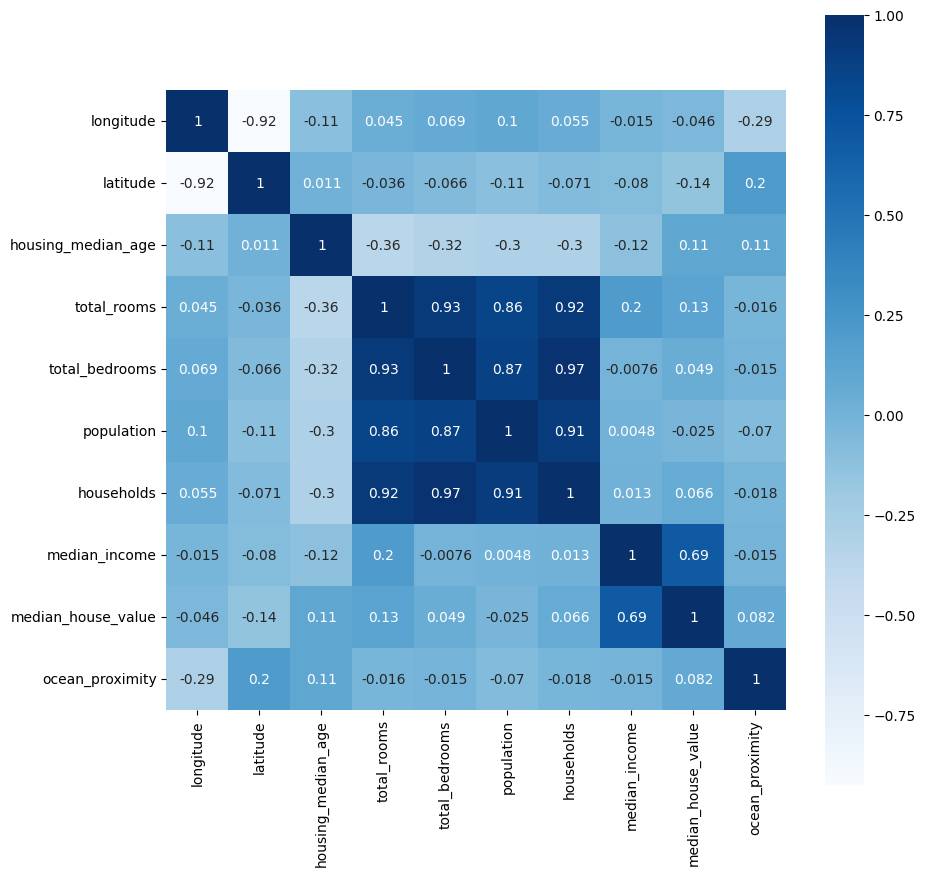

In [11]:
# Tinh su phu thuoc cua tung thuoc tinh
correlation = df.corr(method='pearson')
fig = plt.subplots(figsize=(10,10))
sns.heatmap(correlation, vmax=1, square=True, annot=True, cmap='Blues')

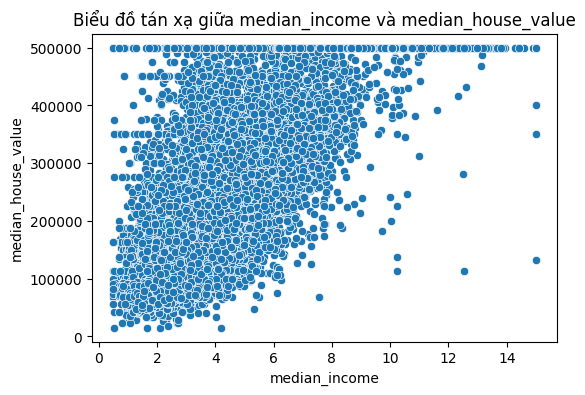

In [12]:
from sklearn.model_selection import train_test_split
# Chia dữ liệu thành tập huấn luyện và tập kiểm thử
X = df['median_income']
y = df['median_house_value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Vẽ biểu đồ tán xạ
plt.figure(figsize=(6, 4)) 
sns.scatterplot(x=X, y=y)
plt.title('Biểu đồ tán xạ giữa median_income và median_house_value')
plt.xlabel('median_income')
plt.ylabel('median_house_value')
plt.show()

In [13]:
# Xem số chiều của tập huấn luyện và tập kiểm thử
print(f"Số chiều của tập huấn luyện: {X_train.shape}")
print(f"Số chiều của tập kiểm thử: {X_test.shape}")
X_train = X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)

Số chiều của tập huấn luyện: (16512,)
Số chiều của tập kiểm thử: (4128,)


In [14]:
#Dùng min max scaler để chuẩn hóa dữ liệu
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(1, 55))
y_train_transformed = sc.fit_transform(y_train.values.reshape(-1,1)).reshape(-1)
y_test_transformed = sc.fit_transform(y_test.values.reshape(-1,1)).reshape(-1)

In [15]:
#Cau 6
#Dùng LinearRegression để dự đoán
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train_transformed)


LinearRegression()

In [16]:
y_pred = model.predict(X_test)
y_pred

array([17.20156934, 27.89289134, 13.79250037, ..., 35.41739207,
       24.14106272, 14.55027712])

In [17]:
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test_transformed, y_pred, squared = True)
print(f"MSE cho lần train này là: {round(MSE,4)}")


MSE cho lần train này là: 87.3391


<Axes: xlabel='median_income', ylabel='median_house_value'>

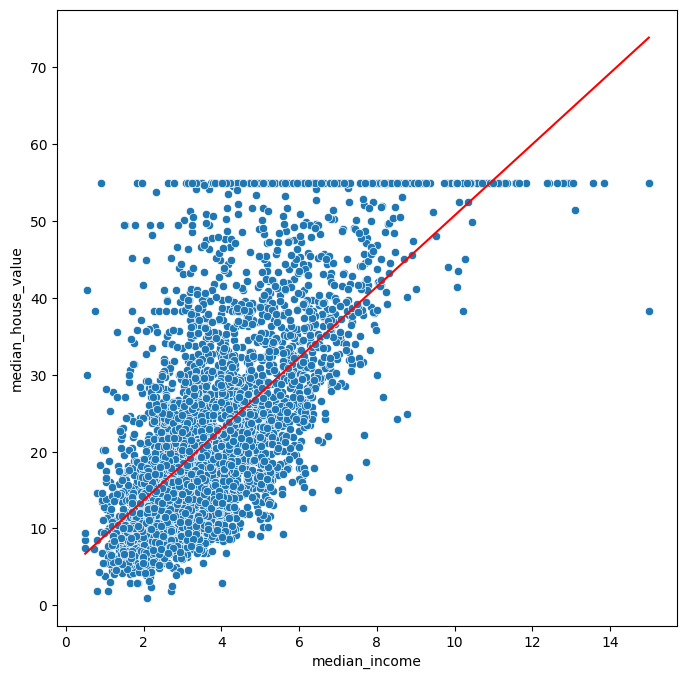

In [18]:
import seaborn as sns
test_true = pd.DataFrame({'median_income': X_test.reshape(-1), 'median_house_value': y_test_transformed})
test_pred = pd.DataFrame({'median_income': X_test.reshape(-1), 'median_house_value': y_pred})
fig= plt.figure(figsize=(8,8))
sns.lineplot(data=test_pred, x="median_income", y="median_house_value",color='red')
sns.scatterplot(data=test_true, x="median_income", y="median_house_value")


In [19]:
#Sử dụng ShuffleSplit để áp dụng CV 
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
kf = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
avg_mse = []
for train_index, test_index in kf.split(X, y):
    x_train = X.iloc[train_index]
    x_train = x_train.values.reshape(-1,1)
    y_train = y.iloc[train_index]
    y_train = y_train.values.reshape(-1,1).reshape(-1)
    
    x_test = X.iloc[test_index]
    x_test = x_test.values.reshape(-1,1)
    y_test = y.iloc[test_index]
    y_test = y_test.values.reshape(-1,1).reshape(-1)
    
    model = LinearRegression()
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    result = mean_squared_error(y_test_transformed, y_pred, squared=True)
    avg_mse.append(result)
for avg in avg_mse:
    print(avg)
avg = np.mean(np.array(avg_mse))
print(f"MSE trung binh la: {avg}")

48272386930.79915
48651033939.854416
49368486666.641136
49093635913.28879
48802370497.7034
48456437138.919014
48791394628.41436
49194290926.89161
48347090271.23424
47643352870.038536
MSE trung binh la: 48662047978.37846


### Bài tập 2

In [20]:
# Tạo X, y để mô hình học và dự đoán, thuộc tính chính để dự đoán là  total_bedroom
X_2 = df['total_bedrooms']
y_2 = df['median_house_value']

from sklearn.model_selection import train_test_split
# Chia dữ liệu thành tập huấn luyện và tập kiểm thử
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_2, y_2, test_size=0.2)

X_train2 = X_train2.values.reshape(-1,1)
X_test2 = X_test2.values.reshape(-1,1)

#Dùng min max scaler để chuẩn hóa dữ liệu
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(1, 55))
y_train_transformed_2 = sc.fit_transform(y_train2.values.reshape(-1,1)).reshape(-1)
y_test_transformed_2 = sc.fit_transform(y_test2.values.reshape(-1,1)).reshape(-1)

#Dùng LinearRegression để dự đoán
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train2, y_train_transformed_2)

y_pred_r = model.predict(X_test2)
y_pred_r

array([22.50770876, 22.45496192, 22.2334252 , ..., 22.3253554 ,
       21.97722626, 22.22890404])

In [21]:
MSE_2 = mean_squared_error(y_test, y_pred_r,squared=True)

print(f"MSE của train bằng total_bedrooms vs median_house_values:\n {MSE_2} vs {MSE}")
print(f"Sự chênh lệch của 2 MSE: {MSE - MSE_2}")

MSE của train bằng total_bedrooms vs median_house_values:
 55661787924.09352 vs 87.33912062792668
Sự chênh lệch của 2 MSE: -55661787836.7544


Từ sự chênh lệch trên, có thể thấy việc train bằng total_bedrooms cho ra kết quả tệ hơn so với train bằng median_income


In [22]:
from sklearn.model_selection import cross_val_score

cross_val_scores_2 = cross_val_score(model, X_train2, y_train_transformed_2, cv=5, scoring='neg_mean_squared_error')
cross_val_scores = cross_val_score(model, X_train, y_train_transformed, cv=5, scoring='neg_mean_squared_error')
# Đổi dấu scores và tính MSE
mse_scores_2 = -cross_val_scores_2
avg_mse_2 = mse_scores_2.mean()
mse_scores = -cross_val_scores
avg_mse = mse_scores.mean()
print(f'Kết quả cross-validation với 5 lần thực hiện cho lần train 1 (MSE): {avg_mse}')
print(f'Kết quả cross-validation với 5 lần thực hiện cho lần train 2 (MSE): {avg_mse_2}')

Kết quả cross-validation với 5 lần thực hiện cho lần train 1 (MSE): 86.83196353976855
Kết quả cross-validation với 5 lần thực hiện cho lần train 2 (MSE): 164.66323279894104


#### -> Sau khi áp dụng 5 folds cv, kết quả thu được vẫn là train bằng median_income tốt hơn

### Bài tập 3

In [23]:
new_cols = ['total_bedrooms','median_income']
X_3 = df[new_cols]
y_3 = df['median_house_value']

from sklearn.model_selection import train_test_split
# Chia dữ liệu thành tập huấn luyện và tập kiểm thử
X_train3, X_test3, y_train3, y_test3 = train_test_split(X_3, y_3, test_size=0.2)

#Dùng min max scaler để chuẩn hóa dữ liệu
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(1, 55))
y_train_transformed_3 = sc.fit_transform(y_train3.values.reshape(-1,1)).reshape(-1)
y_test_transformed_3 = sc.fit_transform(y_test3.values.reshape(-1,1)).reshape(-1)

#Dùng LinearRegression để dự đoán
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train3, y_train_transformed_3)

y_pred_3 = model.predict(X_test3)

cross_val_scores_3 = cross_val_score(model, X_train3, y_train_transformed_3, cv=10, scoring='neg_mean_squared_error')
mse_scores3 = -cross_val_scores_3
avg_mse3 = mse_scores3.mean()

print(f"Kết quả cross-validation với 10 lần thực hiện cho lần train 3 (MSE): {avg_mse3}")

Kết quả cross-validation với 10 lần thực hiện cho lần train 3 (MSE): 86.48907154623367


### Bài tập 4

In [24]:

X = df[columns]
y = df['median_house_value']

from sklearn.model_selection import train_test_split
# Chia dữ liệu thành tập huấn luyện và tập kiểm thử
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#Dùng min max scaler để chuẩn hóa dữ liệu
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(1, 55))
y_train_transformed = sc.fit_transform(y_train.values.reshape(-1,1)).reshape(-1)
y_test_transformed = sc.fit_transform(y_test.values.reshape(-1,1)).reshape(-1)

#Dùng LinearRegression để dự đoán
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train_transformed)

y_pred_lr = model.predict(X_test)

MSE_lr = mean_squared_error(y_test_transformed, y_pred_lr,squared=True)

from sklearn.metrics import r2_score

r_squared_lr = r2_score(y_test_transformed, y_pred_lr)
r_squared_lr

1.0

In [25]:

X = df[columns]
y = df['median_house_value']

from sklearn.model_selection import train_test_split
# Chia dữ liệu thành tập huấn luyện và tập kiểm thử
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#Dùng min max scaler để chuẩn hóa dữ liệu
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(1, 55))
y_train_transformed = sc.fit_transform(y_train.values.reshape(-1,1)).reshape(-1)
y_test_transformed = sc.fit_transform(y_test.values.reshape(-1,1)).reshape(-1)

#Dùng RidgeRegression để dự đoán và GridSearchCV để tìm ra alpha tốt nhất 
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
# Tạo một list các danh sách alpha cho mô hình ridge để tìm ra alpha tốt nhất
alpha = [0.001, 0.01, 0.1, 1, 10, 100]

ridge = Ridge()
# Tạo grid_Search, với estimator là model, param là các paramater, phương pháp đánh giá là mse với 10 lần cv
grid_search = GridSearchCV(estimator=ridge, param_grid={'alpha': alpha}, scoring='neg_mean_squared_error', cv=10)
                          
grid_search.fit(X_train, y_train_transformed)

best_alpha = grid_search.best_params_['alpha']

best_ridge_model = Ridge(alpha=best_alpha)
best_ridge_model.fit(X_train, y_train_transformed)

y_pred_best_ridge = best_ridge_model.predict(X_test)
                                            
r_squared = r2_score(y_test_transformed,y_pred_best_ridge)
                                             
MSE_best_ridge = mean_squared_error(y_test, y_pred_best_ridge, squared=True)
best_alpha, r_squared

(0.001, 1.0)

Dùng R-squared để đánh giá 2 mô hình. R-squared (R^2): R-squared là một số trong khoảng [0, 1] và đo lường sự giải thích của mô hình đối với phương sai của biến phụ thuộc. Giá trị cao hơn cho thấy mô hình tốt hơn. Nếu R-squared bằng 1, mô hình dự đoán tốt hoàn toàn
- Ta thấy giá trị r_squared của ridge cao hơn so với linear

### Bài tập 5

Random Forest là một mô hình ensemble learning được sử dụng cho các bài toán hồi quy và phân loại. RandomForestRegressor là phiên bản của Random Forest được sử dụng cho bài toán hồi quy. Forest ở đây là kết hợp nhiều cây quyết định (Decision Trees) để tạo ra một mô hình mạnh hơn và giảm thiểu overfitting. 

In [26]:
from sklearn.ensemble import RandomForestRegressor


In [27]:

rf_regressor = RandomForestRegressor()

#các tham số 
param_grid = {
    'n_estimators': [10, 50, 100],  # Số decision tree
    'max_depth': [None, 10, 20, 30],  # max depth của mỗi DT
    'min_samples_split': [2, 5, 10],  # min samples của mỗi nút
    'min_samples_leaf': [1, 2, 4]  # min samples của mỗi lá
}



In [28]:
grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, scoring='neg_mean_squared_error', cv=10)



In [ ]:
grid_search.fit(X_train, y_train_transformed)

In [ ]:
best_params = grid_search.best_params_

best_rf_regressor = RandomForestRegressor(n_estimators=best_params['n_estimators'],
                                        max_depth=best_params['max_depth'],
                                        min_samples_split=best_params['min_samples_split'],
                                        min_samples_leaf=best_params['min_samples_leaf'])
best_rf_regressor.fit(X_train, y_train_transformed)


In [ ]:
y_pred_rf = best_rf_regressor.predict(X_test)

MSE_rf = mean_squared_error(y_test_transformed, y_pred_rf, squared=True)
MSE_rf